<h1>Étude de Santé Publique</h1>
<h3>Par valentin Monteiro</h3>

Faire la conversion entre millier million dans le nettoyage des DF -> df_sn*1000


### Import des library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Import des Dataframe</h3>
<p><span style="color: rgb(251, 160, 38);"><strong>df_aa</strong> = aide alimentaire</span><br>
<div style="margin-left: 20px;">
<p>Un fichier d&rsquo;aide alimentaire qui contient :</p>
<ul>
    <li>Le pays b&eacute;n&eacute;ficiaire.</li>
    <li>L&rsquo;ann&eacute;e.</li>
    <li>Le produit.</li>
    <li>La quantit&eacute; qui a &eacute;t&eacute; donn&eacute;e comme aide alimentaire, en tonnes.</li>
</ul>
</div>
   <span style="color: rgb(251, 160, 38);"><strong>df_da</strong> = dispo alimentaire</span><br><br>
<div style="margin-left: 20px;">    
<p>Un fichier de disponibilit&eacute; alimentaire pour l&rsquo;ann&eacute;e 2017 qui contient 17 variables :</p>
<ul>
    <li>Le pays.</li>
    <li>Le produit.</li>
    <li>4 variables de disponibilit&eacute; alimentaire. Ces 4 variables sont exprim&eacute;es dans des unit&eacute;s bien sp&eacute;cifiques, qui sont pr&eacute;cis&eacute;es directement dans le nom de la variable. &Agrave; noter cependant que la notation <em>kcal</em> est un abus de langage, elle correspond &agrave; une calorie r&eacute;elle.</li>
    <li>10 variables qui pr&eacute;cisent les utilisations/moyens d&rsquo;acquisition de la disponibilit&eacute; alimentaire. Elles sont toutes exprim&eacute;es en <strong>milliers de tonnes</strong>.</li>
    <li>Enfin, une variable type qui pr&eacute;cise si le produit est d&rsquo;origine animale ou v&eacute;g&eacute;tale.</li>
</ul>
</div>
<span style="color: rgb(251, 160, 38);"><strong>df_p</strong> = population<br></span>
<div style="margin-left: 20px;">
    <p>Un fichier de population qui inclut :</p>
<ul>
    <li>Le pays.</li>
    <li>L&rsquo;ann&eacute;e.</li>
    <li>La population du pays, exprim&eacute;e en milliers d&rsquo;habitants.</li>
</ul>
</div>
<span style="color: rgb(251, 160, 38);"><strong>df_sn</strong> = sous nutrition</span></p>
<div style="margin-left: 20px;">
    <p>Un fichier d&rsquo;ins&eacute;curit&eacute; alimentaire, qui inclut :</p>
<ul>
    <li>Le pays.</li>
    <li>Intervalle d&rsquo;ann&eacute;es.</li>
    <li>Le&nbsp;nombre de personnes en sous-alimentation en millions d&rsquo;habitants&nbsp;(ex. : pour l&rsquo;intervalle 2016-2018, le nombre de personnes correspond &agrave; la moyenne sur ces 3 ann&eacute;es, on peut le r&eacute;sumer en 2017).</li>
</ul>
</div>


In [2]:
df_aa = pd.read_csv("aide_alimentaire.csv")
df_da = pd.read_csv("dispo_alimentaire.csv")
df_p = pd.read_csv("population.csv")
df_sn = pd.read_csv("sous_nutrition.csv")

### Nettoyage du dataframe Sous Nutrition

In [3]:
# Suppression des valeurs négligeable
df_sn = df_sn[(df_sn["Valeur"]== "<0.1") == False]
# Suppression des valeurs NULL
df_sn = df_sn[df_sn["Valeur"].notnull()]
# Conversion type valeur ➡️ float & million ➡️ millier
df_sn["Valeur"] = (df_sn.Valeur.astype(float))*1000
# Selection année 2017 dans un nouveau DATAframe
df_sn2017 = df_sn[(df_sn["Année"] == "2016-2018") == True]

### Nettoyage du dataframe Population

In [4]:
# Suppression des valeur NULL
df_p = df_p[df_p["Valeur"].notnull()]
# Selection année 2017 dans un nouveau DATAframe
df_p2017=df_p[(df_p["Année"] == 2017) == True]

## Requête 1: Proportion de personnes en état de sous nutrition

In [5]:
taux = (( sum(df_sn2017.Valeur) ) *100) / (sum(df_p2017.Valeur))
taux

7.097118203283067

le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;

In [8]:
df_da_zone = df_da.groupby("Zone").sum()
df_da_zone

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


<h2>Résultat requête 2</h2>

In [9]:
df_dap = df_da_zone.merge(df_p2017, how="inner", left_on="Zone", right_on="Zone")
nb_theorique = (sum(df_dap["Disponibilité alimentaire (Kcal/personne/jour)"]*df_dap["Valeur"]))/2500
nb_theorique

8367593.850932399

In [10]:
df_da_vegetal = df_da[df_da["Origine"] == "vegetale"]
#df_da_v = df_da_v == True
df_da_vegetal = df_da_vegetal.groupby("Zone").sum()
df_da_vegetal 

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


<h2>Résultat requête 3</h2>

In [11]:
df_dap_vegetal = df_da_vegetal.merge(df_p2017, how="inner", left_on="Zone", right_on="Zone")
nb_theorique_vegetal = (sum(df_dap_vegetal["Disponibilité alimentaire (Kcal/personne/jour)"]*df_dap_vegetal["Valeur"]))/2500
nb_theorique_vegetal

6904305.684600402

In [12]:
#df_da_clean =df_da_z.drop(, axis=1)

<p> S'inspirer de la requête 2

In [13]:
s_da = df_da_zone.sum()

In [14]:
s_da
dispo_int = s_da["Disponibilité intérieure"]
s_da = s_da.drop(["Disponibilité intérieure","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"])

In [15]:
s_da_u = s_da.drop(["Exportations - Quantité","Importations - Quantité","Production","Variation de stock"])
s_da_u

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64

<h2>Résultat Requête 4</h2>

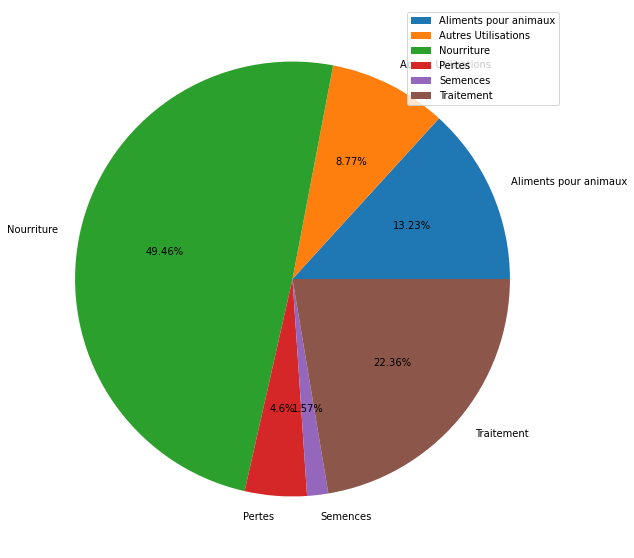

In [16]:
utilisation = s_da_u.plot.pie(y = "index", ylabel="", legend = True, figsize = (10, 10), autopct = lambda x: str(round(x, 2)) + '%' )

In [17]:
top_sa = df_p2017.merge(df_sn2017, how="inner", left_on="Zone", right_on="Zone")
#top_sa1 = top_sa[top_sa["Valeur_y"].notnull()]
top_sa["%"]= (top_sa.Valeur_y.astype(float)*100) / top_sa.Valeur_x.astype(float)

<h2>Résultat requête 5 : proportion de personnes sous-alimentées est la plus forte en 2017</h2>

In [18]:
top_sa.sort_values(by="%", ascending=False).head(10)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,%
32,Haïti,2017,10982.366,2016-2018,5300.0,48.259182
67,République populaire démocratique de Corée,2017,25429.825,2016-2018,12000.0,47.188685
45,Madagascar,2017,25570.512,2016-2018,10500.0,41.062924
44,Libéria,2017,4702.226,2016-2018,1800.0,38.279742
42,Lesotho,2017,2091.534,2016-2018,800.0,38.249438
76,Tchad,2017,15016.753,2016-2018,5700.0,37.957606
69,Rwanda,2017,11980.961,2016-2018,4200.0,35.055619
53,Mozambique,2017,28649.018,2016-2018,9400.0,32.810898
78,Timor-Leste,2017,1243.258,2016-2018,400.0,32.173531
0,Afghanistan,2017,36296.113,2016-2018,10500.0,28.928718


<h2>Requête 6 : pays ayant bénéficié d’aide depuis 2013 </h2>

In [19]:
df_aa.groupby(["Pays bénéficiaire"])["Valeur"].sum().sort_values(ascending = False).reset_index().head(10)

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


<h2>Requête 7 : ceux ayant le plus/le moins de disponibilité/habitant</h2>

In [20]:
df1 = df_dap.groupby(["Zone","Disponibilité intérieure"], as_index = False) ["Disponibilité intérieure"].sum()
df2 = df1.merge(df_p2017, how = 'inner', on="Zone")
df2

,Zone,Disponibilité intérieure,Année,Valeur
0,Afghanistan,13515.0,2017,36296.113
1,Afrique du Sud,61256.0,2017,57009.756
2,Albanie,4758.0,2017,2884.169
3,Algérie,42630.0,2017,41389.189
4,Allemagne,162275.0,2017,82658.409
...,...,...,...,...
167,Émirats arabes unis,11850.0,2017,9487.203
168,Équateur,18614.0,2017,16785.361
169,États-Unis d'Amérique,777992.0,2017,325084.756
170,Éthiopie,44014.0,2017,106399.924


In [21]:
df2["disp/hab"]= df2["Disponibilité intérieure"]/df2["Valeur"]

<h2>Request 7: top10  Diponibilité/habitants la plus élevée</h2>

In [22]:
df2.sort_values(by = "disp/hab" ,ascending = False).head(10)

,Zone,Disponibilité intérieure,Année,Valeur,disp/hab
50,Eswatini,6467.0,2017,1124.805,5.749441
23,Brésil,1033314.0,2017,207833.823,4.971828
63,Guyana,3290.0,2017,775.222,4.243946
17,Belize,1542.0,2017,375.769,4.103585
98,Maurice,4767.0,2017,1264.499,3.769872
44,Danemark,19749.0,2017,5732.274,3.445230
26,Bélarus,27522.0,2017,9450.231,2.912310
51,Fidji,2499.0,2017,877.459,2.847996
10,Australie,66992.0,2017,24584.620,2.724956
88,Lituanie,7467.0,2017,2845.414,2.624223


<h2>Request 8: top10  Diponibilité/habitans la moins élevée</h2>

In [23]:
df2.sort_values(by = "disp/hab" ,ascending = True).head(10)

,Zone,Disponibilité intérieure,Année,Valeur,disp/hab
163,Yémen,9782.0,2017,27834.819,0.351430
150,Tchad,5304.0,2017,15016.753,0.353206
152,Timor-Leste,447.0,2017,1243.258,0.359539
0,Afghanistan,13515.0,2017,36296.113,0.372354
170,Éthiopie,44014.0,2017,106399.924,0.413666
56,Gambie,940.0,2017,2213.889,0.424592
87,Libéria,2002.0,2017,4702.226,0.425756
62,Guinée-Bissau,786.0,2017,1828.145,0.429944
14,Bangladesh,72757.0,2017,159685.424,0.455627
84,Lesotho,966.0,2017,2091.534,0.461862


●	Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien juste ci-dessus.<br>
●	Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.

In [24]:
df_r = df_da[df_da["Produit"].isin(["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"])]
df_r

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,NaN,NaN,1.0,0.15,0.01,0.03,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,NaN,NaN,0.0,0.07,NaN,0.01,1.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


In [25]:
total_cereal = df_r["Disponibilité intérieure"].sum()
total_nourriture_cereal = df_r["Nourriture"].sum()
total_animal_cereal = df_r["Aliments pour animaux"].sum()

<h2>Proportion d'utilisation de céréale utilisé pour l'alimentation humain</h2>

In [26]:
r = (total_nourriture_cereal*100)/total_cereal
r

42.75074480712289

<h2>Proportion d'utilisation de céréale utiliser pour l'alimentation animal</h2>

In [27]:
r = (total_animal_cereal*100)/total_cereal
r

36.291456706047654

In [28]:
df_da_thai = (df_da["Zone"]=="Thaïlande")&(df_da["Produit"]=="Manioc")

In [29]:
df_da_thailande = df_da[df_da_thai]

In [30]:
df_da_thailande[["Zone","Produit","Exportations - Quantité","Production"]]

,Zone,Produit,Exportations - Quantité,Production
13809,Thaïlande,Manioc,25214.0,30228.0


In [31]:
r = (df_da_thailande["Exportations - Quantité"]*100)/df_da_thailande["Production"]

<h2>Taux d'exportation du manioc en Thaïlande</h2>

In [32]:
print(r)

13809    83.41273
dtype: float64
